In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv('Churn_Modelling.csv')
df.sample(6)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
520,521,15671256,Macartney,850,France,Female,35,1,211774.31,1,1,0,188574.12,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
7984,7985,15678206,Yeh,464,France,Male,46,6,161798.53,1,1,0,182944.47,0
784,785,15571221,Bergamaschi,747,Germany,Male,58,7,116313.57,1,1,1,190696.35,1
4378,4379,15771087,Harrison,757,France,Female,71,0,88084.13,2,1,1,154337.47,0
2380,2381,15654463,Moore,841,France,Male,34,4,0.00,2,1,0,141582.66,0


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.drop('CustomerId', axis='columns',inplace=True)

In [6]:
df.sample(5)

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2540,2541,West,550,Germany,Female,45,8,111257.59,1,0,0,97623.42,1
7492,7493,Napolitani,682,France,Male,28,10,200724.96,1,0,1,82872.64,1
3521,3522,Mazure,627,Spain,Male,49,4,111087.50,1,0,1,146680.25,0
9496,9497,Chukwukere,701,France,Male,37,1,0.00,2,1,0,163457.55,0
919,920,Hay,552,Spain,Male,45,9,0.00,2,1,0,26752.56,0


In [7]:
df.drop('RowNumber',axis='columns',inplace=True)

In [8]:
df.sample()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9884,Sergeyeva,751,France,Female,48,4,0.0,1,0,1,30165.06,1


In [9]:
df.drop('Surname',axis='columns',inplace=True)
df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3550,647,Germany,Male,51,4,131156.76,1,1,0,29883.63,0


In [10]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

                
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [16]:
df2=pd.get_dummies(data=df,columns=['Geography'])
df2.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
717,701,Female,42,5,0.00,2,0,0,24210.56,0,0,0,1
5020,491,Female,68,1,95039.12,1,0,1,116471.14,1,0,1,0
1760,521,Male,38,5,110641.18,1,0,1,136507.69,1,1,0,0
6418,754,Female,27,8,0.00,2,0,0,121821.16,0,0,0,1
6443,753,Male,92,3,121513.31,1,0,1,195563.99,0,1,0,0


In [21]:
df2['Gender'].replace({'Female':1,'Male':0},inplace=True)
df2.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
6580,527,1,30,6,126663.51,1,1,1,162267.91,0,0,1,0
3626,789,1,37,6,110689.07,1,1,1,71121.04,1,0,1,0
8795,651,0,38,2,0.00,3,1,0,67029.82,1,0,0,1
7396,603,1,56,5,90778.76,2,1,0,162223.67,1,0,0,1
4791,709,0,35,2,0.00,2,1,0,104982.39,0,0,0,1
8141,486,0,24,1,0.00,1,1,0,98802.76,0,0,0,1
6593,655,1,30,1,83173.98,2,1,1,184259.60,0,0,1,0
1020,625,0,49,6,173434.90,1,1,0,165580.93,1,1,0,0
2930,663,0,42,7,115930.87,1,1,0,19862.78,0,0,1,0
2815,694,0,37,1,95668.82,2,1,0,100335.55,0,0,1,0


In [26]:
from sklearn.preprocessing import MinMaxScaler

scale_columns=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

scaler=MinMaxScaler()
df2[scale_columns]=scaler.fit_transform(df2[scale_columns])

In [28]:
df2.sample(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
7572,0.472,0,0.256757,0.8,0.668541,0.333333,0,1,0.523321,0,0,1,0
4003,0.800,1,0.108108,0.1,0.603871,0.333333,1,1,0.099560,0,1,0,0


In [29]:
y=df2.Exited
x=df2.drop('Exited',axis=1)
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [31]:
x.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7678,0.590,0,0.175676,0.7,0.642379,0.333333,1,0,0.062948,1,0,0
7984,0.228,0,0.378378,0.6,0.644877,0.000000,1,0,0.914752,1,0,0
9289,0.422,1,0.175676,0.1,0.324754,0.333333,1,1,0.326146,1,0,0


In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [33]:
X_train.shape

(8000, 12)

In [34]:
X_test.shape

(2000, 12)

In [35]:
len(X_train.columns)

12

In [39]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(12,input_shape=(12,), activation='relu'),
    keras.layers.Dense(8,activation='relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
250/250 [==============================] - 1s 2ms/step - loss: 0.5796 - accuracy: 0.7369
Epoch 2/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.7974
Epoch 3/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.4531 - accuracy: 0.8067
Epoch 4/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.4382 - accuracy: 0.8185
Epoch 5/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.4299 - accuracy: 0.8221
Epoch 6/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.8254
Epoch 7/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.8281
Epoch 8/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.4126 - accuracy: 0.8314
Epoch 9/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8314
Epoch 10/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.404

250/250 [==============================] - 0s 2ms/step - loss: 0.3347 - accuracy: 0.8650
Epoch 81/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 0.8641
Epoch 82/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8671
Epoch 83/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.8655
Epoch 84/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3335 - accuracy: 0.8649
Epoch 85/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3337 - accuracy: 0.8658
Epoch 86/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3333 - accuracy: 0.8651
Epoch 87/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8670
Epoch 88/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3347 - accuracy: 0.8644
Epoch 89/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3325 - a

250/250 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8679
Epoch 160/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3295 - accuracy: 0.8661
Epoch 161/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3291 - accuracy: 0.8665
Epoch 162/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8694
Epoch 163/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8683
Epoch 164/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3267 - accuracy: 0.8662
Epoch 165/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3265 - accuracy: 0.8673
Epoch 166/1000
250/250 [==============================] - 1s 2ms/step - loss: 0.3282 - accuracy: 0.8684
Epoch 167/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.8686
Epoch 168/1000
250/250 [==============================] - 0s 2ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3253 - accuracy: 0.8673
Epoch 238/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3247 - accuracy: 0.8685
Epoch 239/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3248 - accuracy: 0.8690
Epoch 240/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3248 - accuracy: 0.8671
Epoch 241/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3248 - accuracy: 0.8698
Epoch 242/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3240 - accuracy: 0.8681
Epoch 243/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3244 - accuracy: 0.8661
Epoch 244/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3248 - accuracy: 0.8689
Epoch 245/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3237 - accuracy: 0.8684
Epoch 246/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3213 - accuracy: 0.8692
Epoch 316/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3217 - accuracy: 0.8702
Epoch 317/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8684
Epoch 318/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3227 - accuracy: 0.8690
Epoch 319/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3217 - accuracy: 0.8676
Epoch 320/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3218 - accuracy: 0.8687
Epoch 321/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3213 - accuracy: 0.8721
Epoch 322/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3220 - accuracy: 0.8679
Epoch 323/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3222 - accuracy: 0.8690
Epoch 324/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3215 - accuracy: 0.8711
Epoch 394/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3210 - accuracy: 0.8690
Epoch 395/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3202 - accuracy: 0.8691
Epoch 396/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3205 - accuracy: 0.8711
Epoch 397/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3210 - accuracy: 0.8702
Epoch 398/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3208 - accuracy: 0.8702
Epoch 399/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3212 - accuracy: 0.8687
Epoch 400/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3191 - accuracy: 0.8701
Epoch 401/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3215 - accuracy: 0.8684
Epoch 402/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3192 - accuracy: 0.8701
Epoch 472/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3196 - accuracy: 0.8709
Epoch 473/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3189 - accuracy: 0.8708
Epoch 474/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3206 - accuracy: 0.8690
Epoch 475/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3193 - accuracy: 0.8708
Epoch 476/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3185 - accuracy: 0.8716
Epoch 477/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3208 - accuracy: 0.8691
Epoch 478/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3189 - accuracy: 0.8716
Epoch 479/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3207 - accuracy: 0.8694
Epoch 480/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3180 - accuracy: 0.8716
Epoch 550/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3188 - accuracy: 0.8701
Epoch 551/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3215 - accuracy: 0.8689
Epoch 552/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3187 - accuracy: 0.8700
Epoch 553/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3189 - accuracy: 0.8709
Epoch 554/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3187 - accuracy: 0.8711
Epoch 555/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3183 - accuracy: 0.8702
Epoch 556/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3189 - accuracy: 0.8691
Epoch 557/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3181 - accuracy: 0.8704
Epoch 558/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 1s 3ms/step - loss: 0.3169 - accuracy: 0.8705
Epoch 628/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3185 - accuracy: 0.8689
Epoch 629/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3160 - accuracy: 0.8700
Epoch 630/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8714
Epoch 631/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3162 - accuracy: 0.8734
Epoch 632/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3159 - accuracy: 0.8725
Epoch 633/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3170 - accuracy: 0.8719
Epoch 634/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3163 - accuracy: 0.8730
Epoch 635/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3173 - accuracy: 0.8717
Epoch 636/1000
250/250 [==============================] - 0s 2ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3155 - accuracy: 0.8721
Epoch 706/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8725
Epoch 707/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.8709
Epoch 708/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3156 - accuracy: 0.8723
Epoch 709/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3154 - accuracy: 0.8711
Epoch 710/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8715
Epoch 711/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3164 - accuracy: 0.8705
Epoch 712/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3149 - accuracy: 0.8726
Epoch 713/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3151 - accuracy: 0.8734
Epoch 714/1000
250/250 [==============================] - 0s 2ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3137 - accuracy: 0.8733
Epoch 784/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3135 - accuracy: 0.8756
Epoch 785/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3136 - accuracy: 0.8761
Epoch 786/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3139 - accuracy: 0.8739
Epoch 787/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.8741
Epoch 788/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3142 - accuracy: 0.8749
Epoch 789/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3136 - accuracy: 0.8725
Epoch 790/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3128 - accuracy: 0.8761
Epoch 791/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3132 - accuracy: 0.8760
Epoch 792/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3142 - accuracy: 0.8720
Epoch 862/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3131 - accuracy: 0.8745
Epoch 863/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3127 - accuracy: 0.8731
Epoch 864/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3137 - accuracy: 0.8744
Epoch 865/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3124 - accuracy: 0.8746
Epoch 866/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3122 - accuracy: 0.8726
Epoch 867/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3127 - accuracy: 0.8739
Epoch 868/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3128 - accuracy: 0.8739
Epoch 869/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3133 - accuracy: 0.8745
Epoch 870/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3126 - accuracy: 0.8751
Epoch 940/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3110 - accuracy: 0.8733
Epoch 941/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3120 - accuracy: 0.8737
Epoch 942/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3122 - accuracy: 0.8761
Epoch 943/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3118 - accuracy: 0.8744
Epoch 944/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3127 - accuracy: 0.8739
Epoch 945/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3108 - accuracy: 0.8742
Epoch 946/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3123 - accuracy: 0.8746
Epoch 947/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3102 - accuracy: 0.8758
Epoch 948/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

In [40]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3417 - accuracy: 0.8560


[0.34172436594963074, 0.8560000061988831]

In [41]:
yp = model.predict(X_test)
yp[:5]

63/63 [==============================] - 0s 1ms/step


array([[0.07634169],
       [0.135085  ],
       [0.23214847],
       [0.9724944 ],
       [0.00554362]], dtype=float32)

In [43]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:10]

[0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

In [44]:
y_test[:10]

5030    0
2099    0
3117    0
3959    1
5616    0
9409    0
9853    0
7946    0
2009    1
9040    0
Name: Exited, dtype: int64

In [45]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1587
           1       0.73      0.48      0.58       413

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.84      2000



Text(95.72222222222221, 0.5, 'Truth')

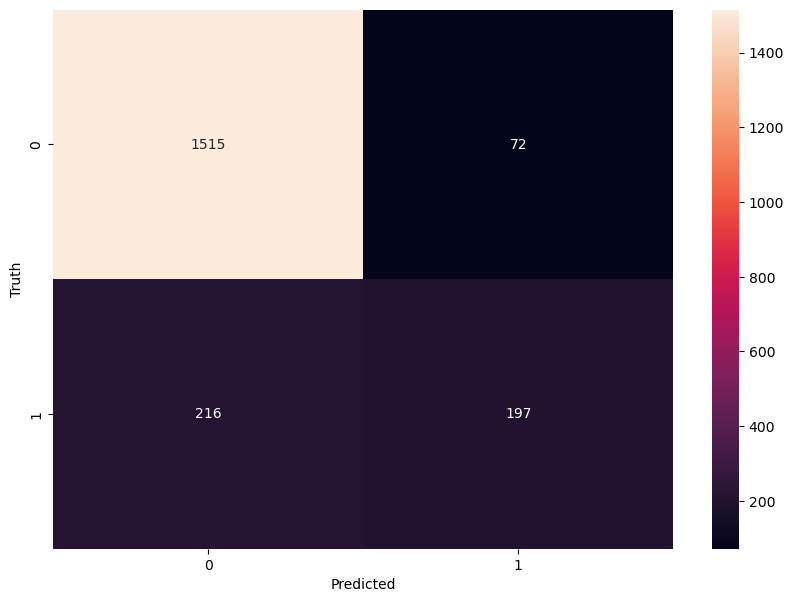

In [46]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [47]:
model.save('bank_churn.h5')

A:\New folder (2)\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
load_model=keras.mload_model('bank_churn.h5')

NameError: name 'load_model' is not defined